In [1]:
from discopy import grammar
from discopy.rewriting import InterchangerError

def draw(diagram):
    for i, box in enumerate(diagram.boxes):
        if isinstance(box, Word):
            for j in reversed(range(i)):
                if isinstance(diagram.boxes[j], Word):
                    break

                try:
                    diagram = diagram.interchange(j, j+1)
                except InterchangerError:
                    diagram.draw()
                    return
        elif not isinstance(box, Cup):
            diagram.draw()
            return
    grammar.draw(diagram)

In [2]:
from discopy import Word
from discopy.rigid import Cup, Diagram, Id

from discoket.core.types import AtomicType

N = AtomicType.NOUN
S = AtomicType.SENTENCE

In [3]:
from discoket.rewrite import Rewriter

rewriter = Rewriter()

### Auxiliary rule

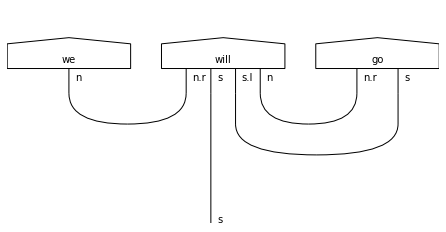

↓ rewriting (auxiliary rule)


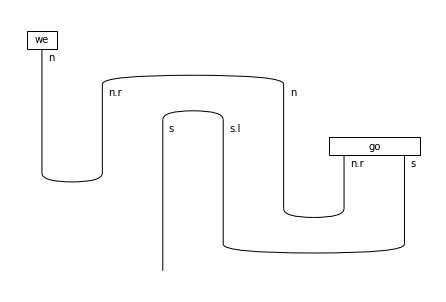

↓ normal form


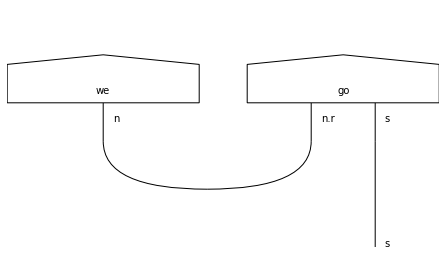

In [4]:
diagram = ((Word('we', N) @ Word('will', (N >> S) << (N >> S)) @
            Word('go', N >> S)) >>
           Cup(N, N.r) @ Id(S) @ Diagram.cups((N >> S).l, N >> S))

draw(diagram)
print('↓ rewriting (auxiliary rule)')
draw(Rewriter(['auxiliary'])(diagram))
print('↓ normal form')
draw(rewriter(diagram).normal_form())

### Connector rule

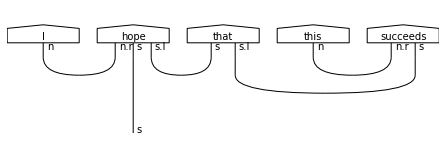

↓ rewriting (connector rule)


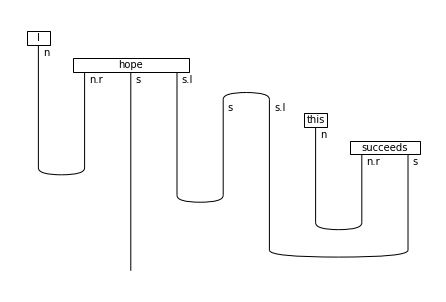

↓ normal form


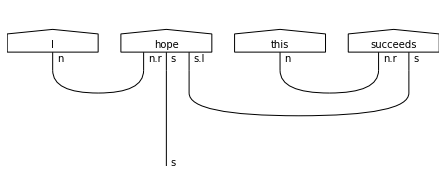

In [5]:
diagram = ((Word('I', N) @ Word('hope', N >> S << S) @
            Word('that', S << S) @ Word('this', N) @
            Word('succeeds', N >> S)) >>
           (Cup(N, N.r) @ Id(S) @ Cup(S.l, S) @
            Diagram.cups((N >> S).l, N >> S)))

draw(diagram)
print('↓ rewriting (connector rule)')
draw(Rewriter(['connector'])(diagram))
print('↓ normal form')
draw(rewriter(diagram).normal_form())

### Determiner rule

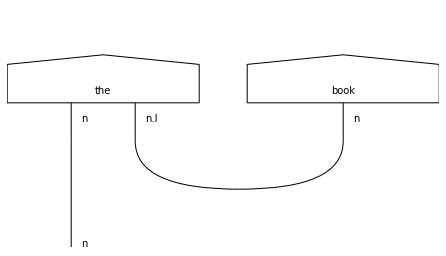

↓ rewriting (determiner rule)


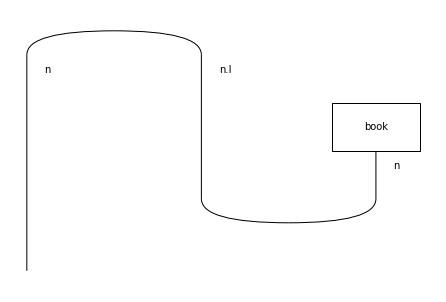

↓ normal form


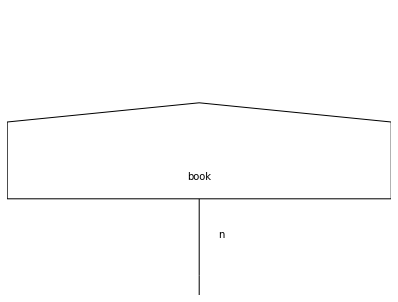

In [6]:
diagram = (Word('the', N << N) @ Word('book', N) >>
           Id(N) @ Cup(N.l, N))

draw(diagram)
print('↓ rewriting (determiner rule)')
draw(Rewriter(['determiner'])(diagram))
print('↓ normal form')
draw(rewriter(diagram).normal_form())

### Adverb rules

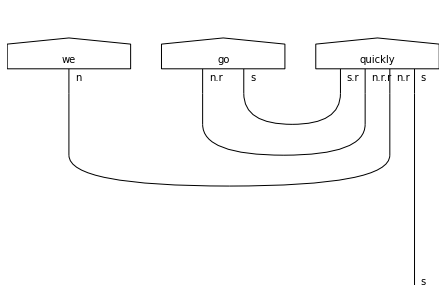

↓ rewriting (postadverb rule)


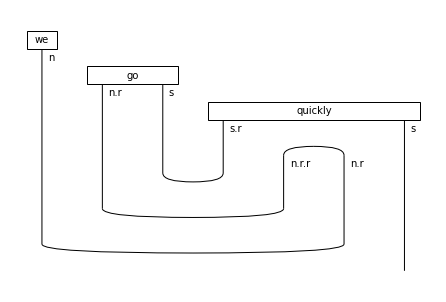

↓ normal form


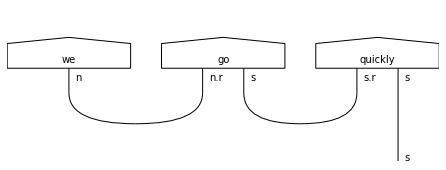

In [7]:
cod = (N >> S) >> (N >> S)
diagram = (Word('we', N) @ Word('go', N >> S) @ Word('quickly', cod) >>
           Diagram.cups(cod[:3].l, cod[:3]) @ Id(S))

draw(diagram)
print('↓ rewriting (postadverb rule)')
draw(Rewriter(['postadverb'])(diagram))
print('↓ normal form')
draw(rewriter(diagram).normal_form())

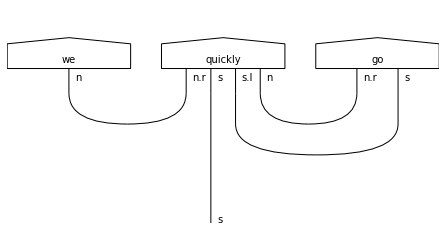

↓ rewriting (preadverb rule)


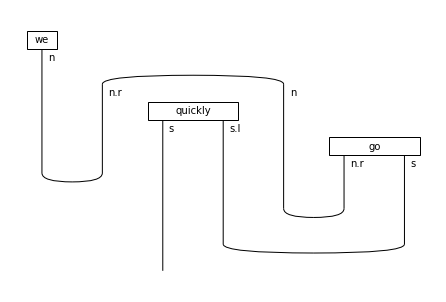

↓ normal form


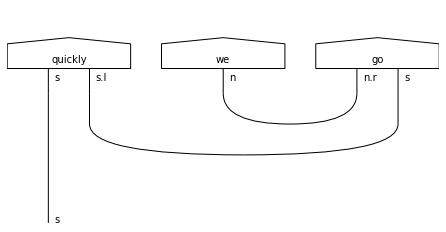

In [8]:
diagram = ((Word('we', N) @ Word('quickly', (N >> S) << (N >> S)) @
            Word('go', N >> S)) >>
           Cup(N, N.r) @ Id(S) @ Diagram.cups((N >> S).l, N >> S))

draw(diagram)
print('↓ rewriting (preadverb rule)')
draw(Rewriter(['preadverb'])(diagram))
print('↓ normal form')
draw(rewriter(diagram).normal_form())

### Prepositional phrase rule

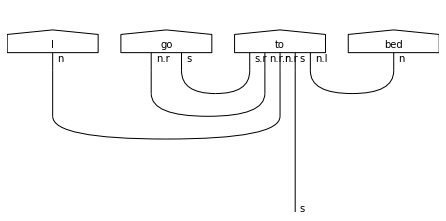

↓ rewriting (prepositional phrase rule)


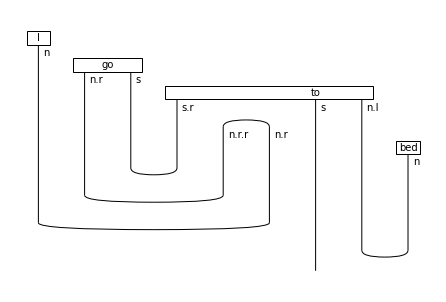

↓ normal form


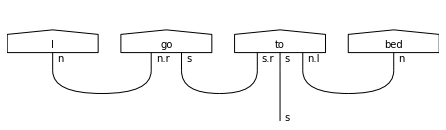

In [9]:
cod = (N >> S) >> (N >> S << N)
diagram = ((Word('I', N) @ Word('go', N >> S) @ Word('to', cod) @
            Word('bed', N)) >>
           Diagram.cups(cod[:3].l, cod[:3]) @ Id(S) @ Cup(N.l, N))

draw(diagram)
print('↓ rewriting (prepositional phrase rule)')
draw(Rewriter(['prepositional_phrase'])(diagram))
print('↓ normal form')
draw(rewriter(diagram).normal_form())